In [1]:
import numpy as np

from numba import jit

In [2]:
@jit(nopython=True)
def python_logistic(N):
    # Parameters
    T = 25
    u0 = 1e-5
    # Right hand side function
    f = lambda u: u*(1-u)
    # Discretization
    t = np.linspace(0,T,N)
    dt = T/N
    # Time stepping
    u = np.empty(N)
    u[0] = u0
    for k in range(N-1):
        u[k+1] = u[k] + dt*f(u[k])
    return(t,u)

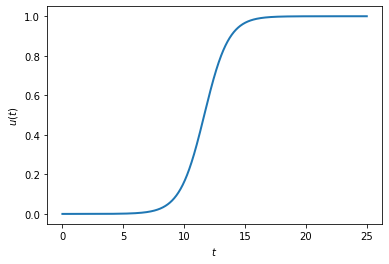

In [3]:
T,U = python_logistic(1000)
import matplotlib.pyplot as plt
plt.plot(T,U,lw=2)
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.show()

In [4]:
%timeit python_logistic(1000)

4.99 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
